In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [2]:
wine= pd.read_csv(r"C:\Users\paryn\Downloads\Wine_clust .csv")

In [3]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 13)

In [5]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Data Preprocessing

In [6]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

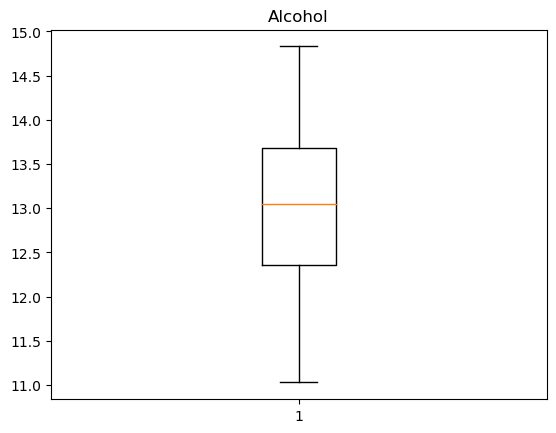

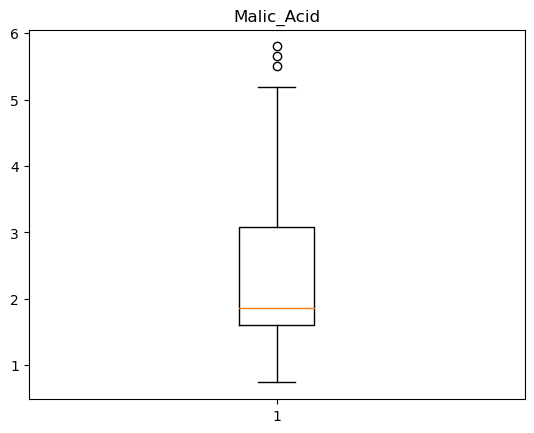

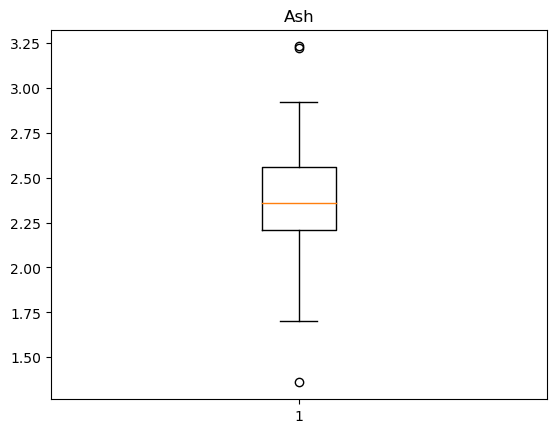

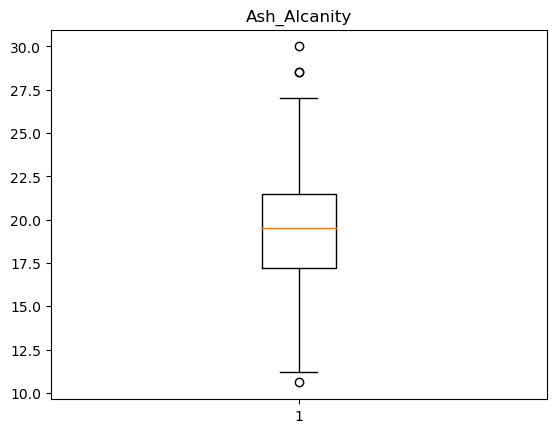

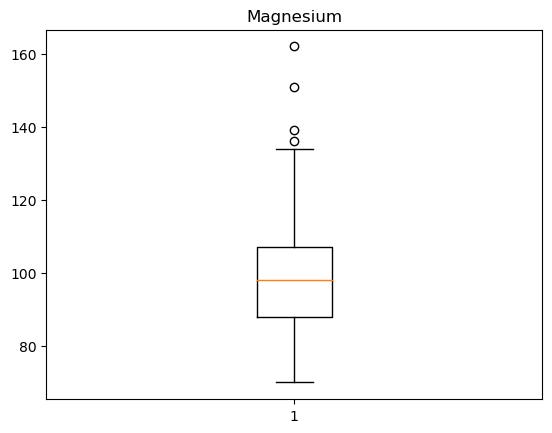

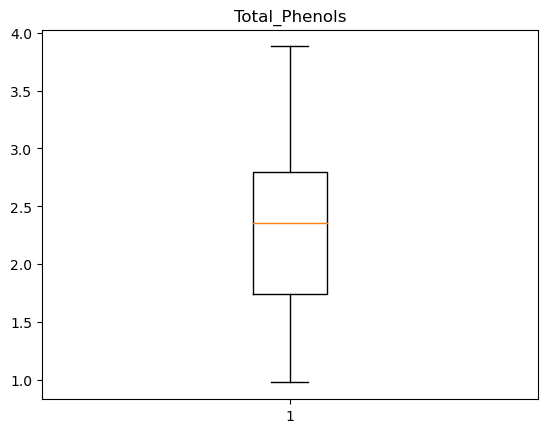

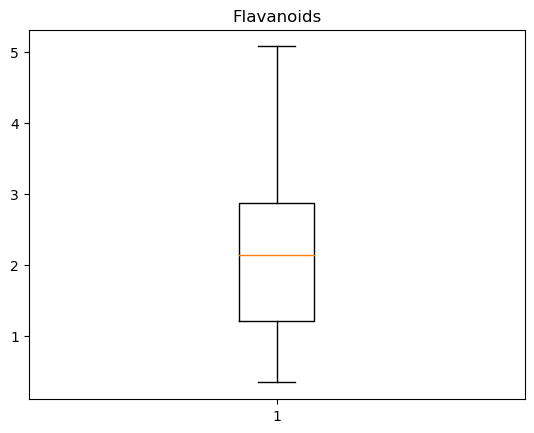

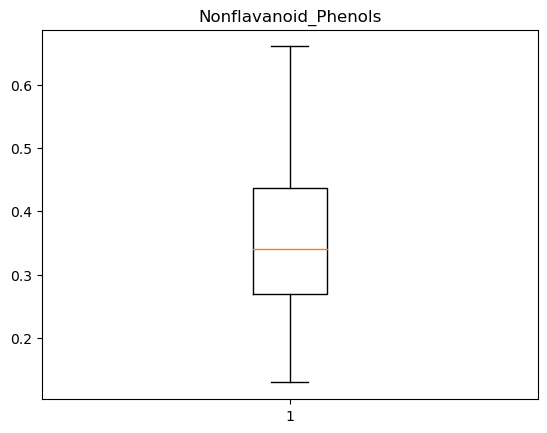

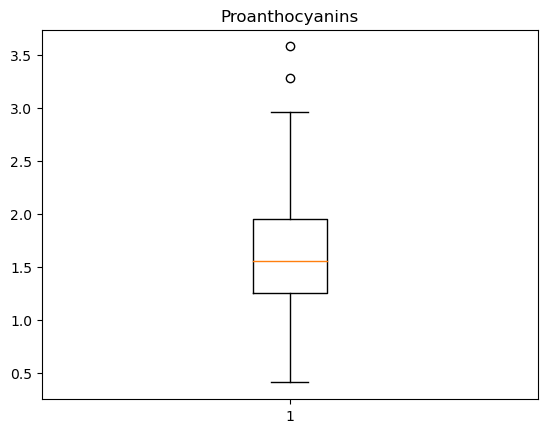

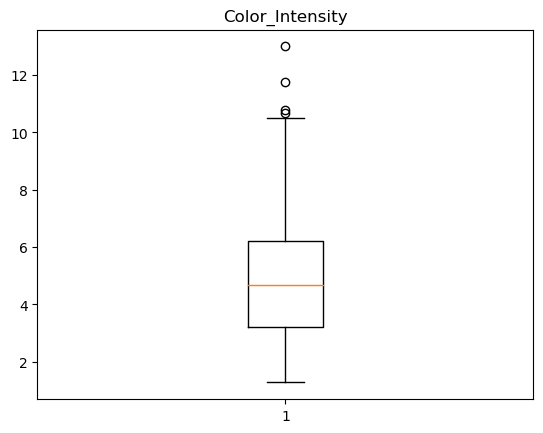

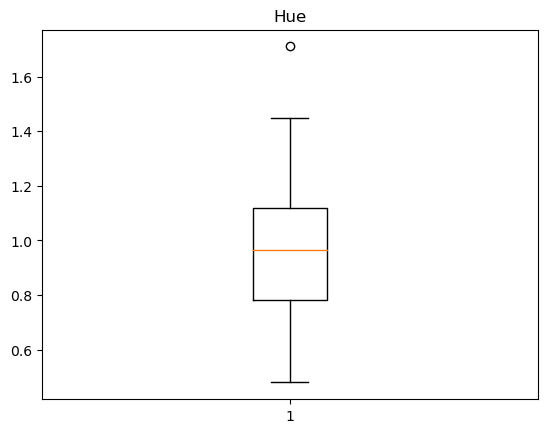

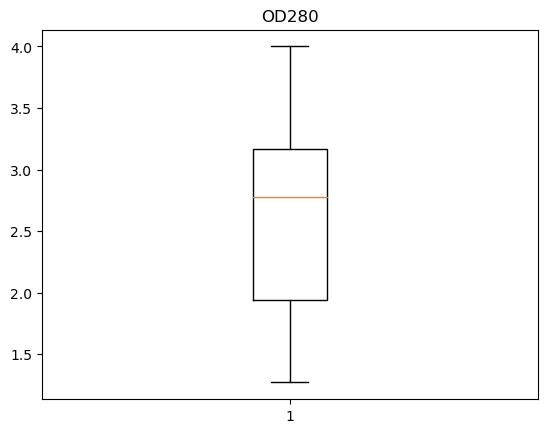

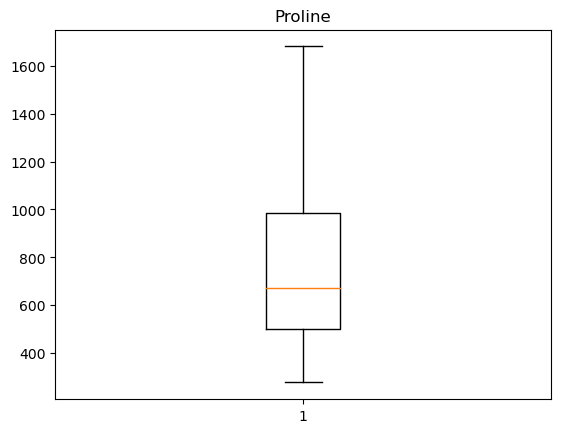

In [7]:
for i in wine:
    plt.boxplot(wine[i])
    plt.title(i)
    plt.show()

Assigning features to x

In [8]:
x= wine.values

In [9]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# K-Means Clustering

Finding optimum number of clusters using Elbow method

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

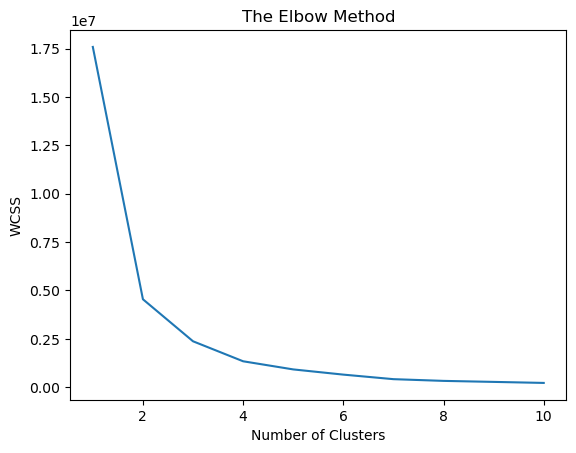

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans= KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Fitting to KMeans with 3 Clusters

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualising Clusters

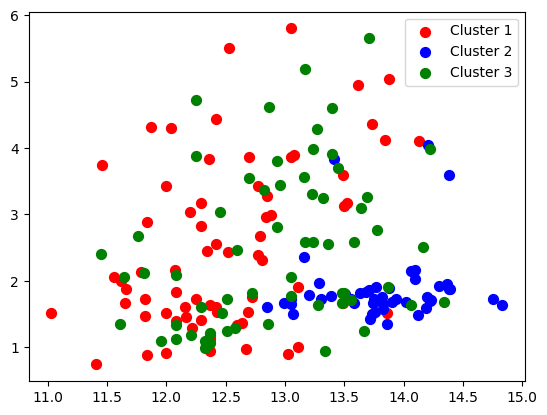

In [12]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(x, y_kmeans)
print(silhouette_avg1)

0.571138193786884


In [14]:
labels = kmeans.labels_
wine1=wine.copy()
wine1['Cluster'] = labels

In [15]:
wine1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


# Hierarchical CLustering

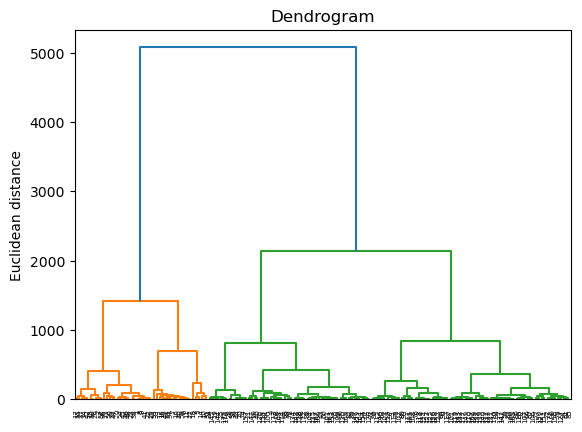

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method= 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage='ward')

yhc= hc.fit_predict(x)

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


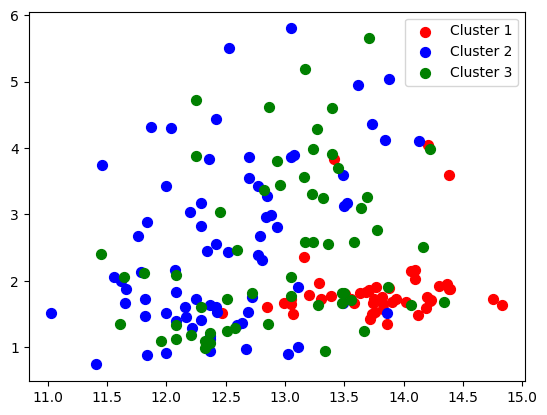

In [18]:
plt.scatter(x[yhc == 0, 0], x[yhc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[yhc == 1, 0], x[yhc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[yhc == 2, 0], x[yhc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(x, yhc)
print(silhouette_avg1)

0.5644796401732071


# dB Scan

In [20]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=6, min_samples=3)
labels = db.fit_predict(x)

In [21]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

In [22]:
model=db.fit(x)
#labels=model.labels_

In [23]:
silhouette_avg1 = silhouette_score(x, labels)
print(silhouette_avg1)

-0.41452826207507504


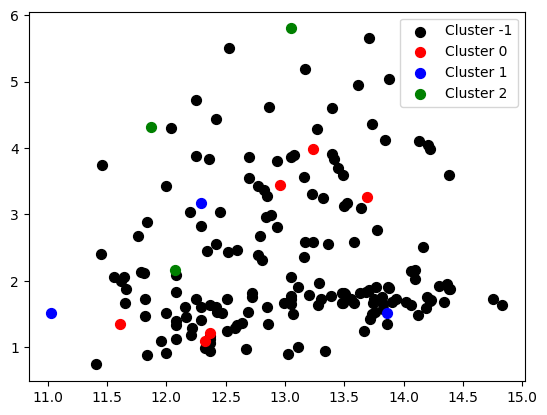

In [24]:
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], s = 50, c = 'black', label = 'Cluster -1')
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.legend()
plt.show()

In [38]:
#DB Scan doesn't provide a good clustering for this dataset. Most of the points are taken as noise before PCA.

# Clustering after scaling and PCA

Standard scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scaled= scalar.fit_transform(wine)
scaled= pd.DataFrame(scaled, columns=wine.columns)
scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


PCA

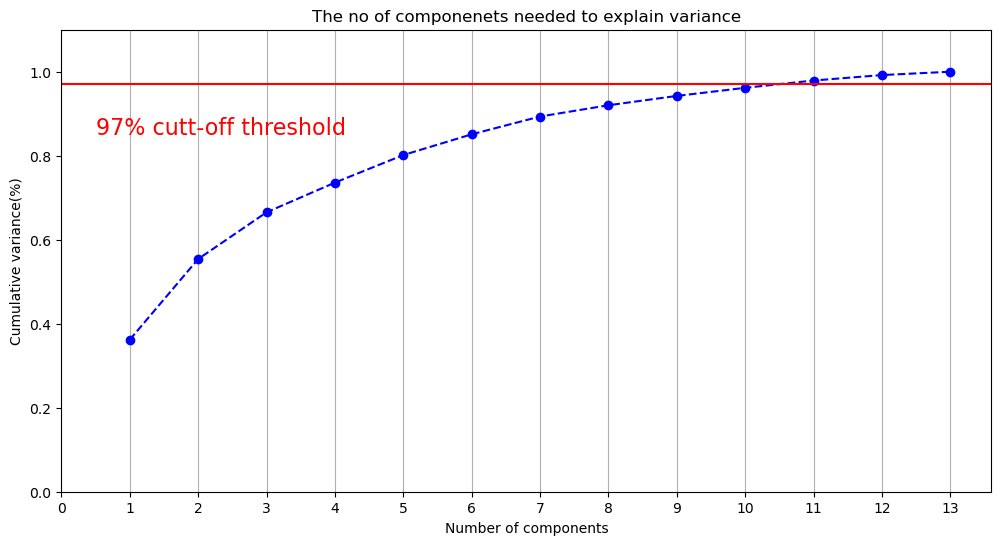

In [27]:
from sklearn.decomposition import PCA
pca= PCA().fit(scaled)
plt.rcParams['figure.figsize']=(12,6)

fig, ax= plt.subplots()
xi= np.arange(1,14, step=1)
y=np.cumsum(pca.explained_variance_ratio_)
#cumulative sum of explained variance ratio from a PCA object
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,14, step=1))
plt.ylabel('Cumulative variance(%)')
plt.title('The no of componenets needed to explain variance')
plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cutt-off threshold', color= 'red', fontsize=16)
#97% of data preserved
ax.grid(axis='x')
plt.show()

In [28]:
scaled.shape

(178, 13)

In [29]:
pca= PCA(n_components=10) 
pca.fit(scaled)
xpca= pca.transform(scaled)
xpca.shape

(178, 10)

In [30]:
pca.components_.shape 

(10, 13)

KMeans CLustering

In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=42)
y_kmeans = kmeans.fit_predict(xpca)

C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
silhouette_avg1 = silhouette_score(x, y_kmeans)
print(silhouette_avg1)

0.1942818409408564


Hierarchical clustering

In [33]:
hc= AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage='ward')
yhc= hc.fit_predict(xpca)
silhouette_avg1 = silhouette_score(xpca, yhc)
print(silhouette_avg1)

0.28395207781384063


C:\Users\paryn\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


dB Scan

In [34]:
db = DBSCAN(eps=2, min_samples=4)
labels = db.fit_predict(xpca)
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

In [35]:
silhouette_avg1 = silhouette_score(x, labels)
print(silhouette_avg1)

-0.2624342470257687


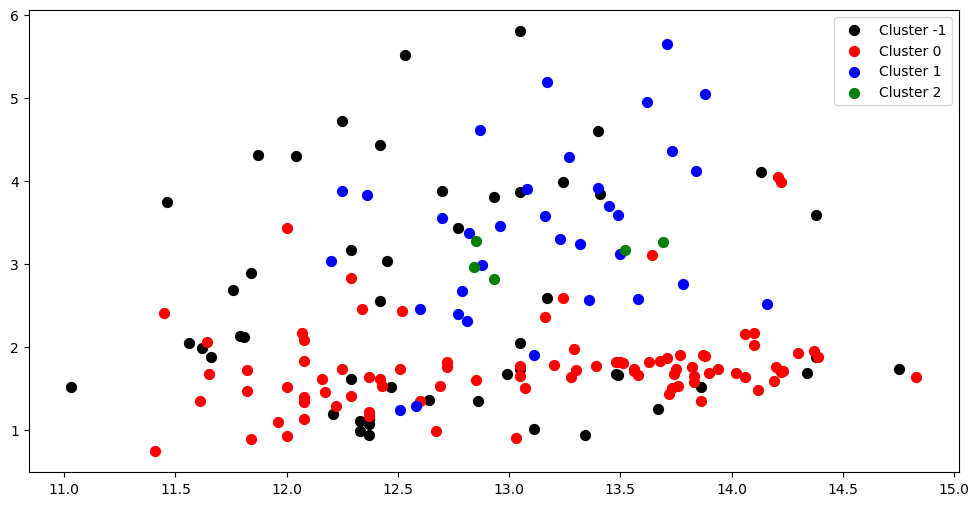

In [36]:
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], s = 50, c = 'black', label = 'Cluster -1')
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.legend()
plt.show()

In [37]:
#DB Scan clustering gets better after scaling and PCA

# Silhouette scores

(Before Scaling and PCA)

KMeans Clustering- 0.571138193786884

Hierarchical Clustering- 0.5644796401732071

DB Scan - -0.41452826207507504

(After scaling and PCA)

KMeans Clustering - 0.1942818409408564

Hierarchical clustering - 0.28395207781384063

DB scan - -0.2624342470257687